!jt -t chesterish
# !jt -r

In [4]:
from genetic_algorithm import *
from numpy.random import default_rng


import binascii


import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
%matplotlib notebook

import copy
from collections import Counter
import pandas as pd

In [10]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 50

## world size
world_size = 10
world_size_x = world_size
world_size_y = world_size

## generations

0



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 106.49it/s]


<IPython.core.display.Javascript object>


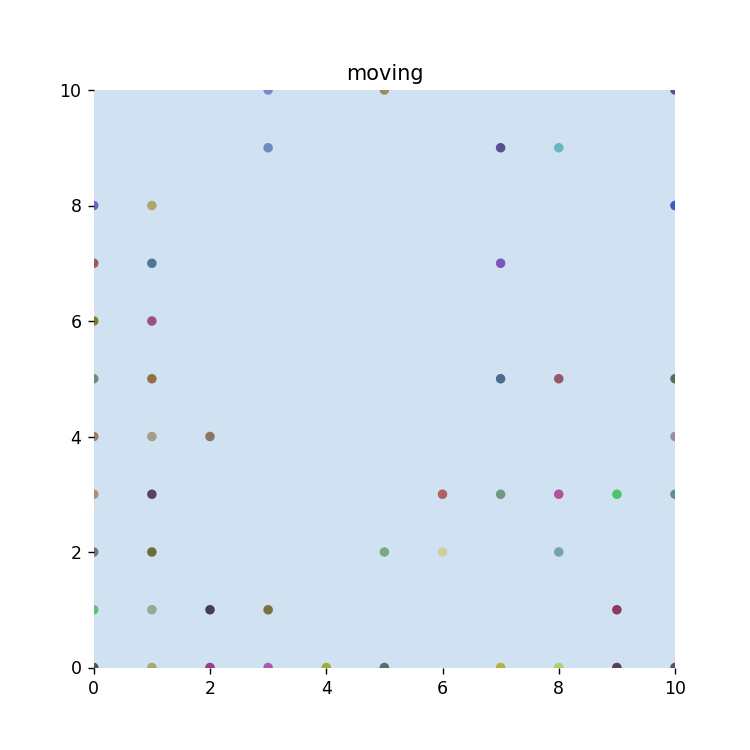

MovieWriter imagemagick unavailable; using Pillow instead.


1



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 103.08it/s]


<IPython.core.display.Javascript object>


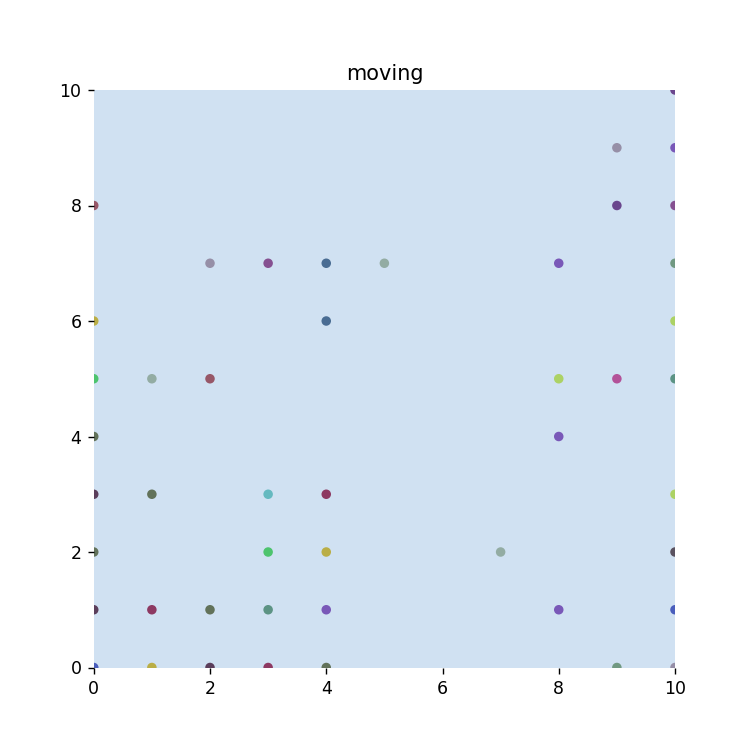

MovieWriter imagemagick unavailable; using Pillow instead.


In [11]:
result = {}
for gen_nr in range(2):
    print(gen_nr)
    if gen_nr == 0:
        result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)
#         print(result[0])
    else:
        
        result = asexual_reproduction_and_mutation(world_size, result, nr_individuals)
        
        result = next_generation(result,nr_of_input, nr_of_actions, nr_of_inner, world_size, nr_individuals)
#         print(result[0])
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)
        
#     coords = generate_dictionary_of_coords(result, world_size+1)
    
    result.update(result)
    
    dic_color = {}
    for indiv in result:
        rgb_colors = list(map(hex_to_rgb, result[indiv]['genome']))
        color = tuple(pd.DataFrame(rgb_colors).median()) 
        dic_color[indiv] = color
        
    coords = generate_dictionary_of_coords(result, world_size*2, dic_color)
    
    def update(i):
        ax.clear()
        ax.set_facecolor(plt.cm.Blues(.2))

        ax.set_xlim([0,world_size_x])
        ax.set_ylim([0,world_size_y])
        ax.set_title('moving')
        ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c=coords[i]['color'], s=20, marker='o')
#         ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
        [spine.set_visible(False) for spine in ax.spines.values()]


    fig, ax = plt.subplots(figsize=(6,6))
    myAnimation = FuncAnimation(
        fig = fig,
        func = update,
        frames = len(coords),
        interval = 10, repeat=False
    )
    myAnimation.save(f'generation-{gen_nr}.gif', writer='imagemagick' , fps=10)

In [12]:
result

{0: {'out': {'out1': 0.0, 'out4': 0.017},
  'brain': {'mid1mid1': ['mid1', 'mid1', -2.6363497634671145],
   'in0out1': ['in0', 'out1', -3.394597894094308],
   'mid2mid2': ['mid2', 'mid2', -3.8228597588890585],
   'in1mid0': ['in1', 'mid0', 3.6397375247978023],
   'in1out4': ['in1', 'out4', -2.035952998626583],
   'in1out1': ['in1', 'out1', -2.994658934839005]},
  'in': ['in1', 'in0'],
  'genome': ['9c67545b',
   'cea6c9e',
   'a9777a52',
   '655df476',
   '379d4125',
   '5fe05fd2',
   '486d468f',
   '44375032'],
  'position': [[7, 0],
   [6, 0],
   [5, 0],
   [5, 0],
   [5, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0],
   [4, 0]],
  'brain_after_pruning': [('mid1', 'mid1', -2.6363497634671145),
   ('in0', 'out1', -3.394597894094308),
   ('mid2', 'mid2', -3.8228597588890585),
   ('in1', 'mid0', 3.6397375247978023),
   ('in1', 'out4', -2.035952998626583),
   ('in1', 

In [13]:
def asexual_reproduction_and_mutation(world_size, result, nr_individuals):
    survivors, n = select_individuals_from_safezone(world_size, result)

    ## reproduct survivors        
    new_indiv_len = nr_individuals - list(survivors.keys())[-1]
    new_indiv_nr = np.random.choice(list(survivors.keys()), new_indiv_len-1)

    for key in new_indiv_nr:
        survivors[n] = {'genome':[]}
        survivors[n]['genome'] = survivors[key]['genome'] 
        n+=1
        
    ## mutate population
#     for key in survivors:
#         genome_mutation(survivors[key]['genome'])
    
    return survivors

In [14]:
asexual_reproduction_and_mutation(world_size, result, nr_individuals)

{0: {'genome': ['4058ca2c',
   '64f06d2d',
   '2e106dde',
   'de4010a3',
   '68345dc5',
   '1bdc62a4',
   '634d051f',
   '51ae5d74']},
 1: {'genome': ['ef39b807',
   '6e3e4b0b',
   'c23787c0',
   'ccd2abe4',
   '3899c7d2',
   'f1fa5859',
   'a443522b',
   '2561b0d3']},
 2: {'genome': ['3711afa5',
   '2a0fa6eb',
   '7700fef8',
   '3789c98f',
   'aa9112c',
   '025ceca8',
   'a85fdc78',
   '5caa4199']},
 3: {'genome': ['374280da',
   '7bafc049',
   '7f42d923',
   'b82f55d9',
   '09a7f5c7',
   '777fe400',
   'b01829db',
   '646eaf52']},
 4: {'genome': ['6be91e0e',
   '32cbe1f2',
   '762608d0',
   'aa417ad0',
   'e590f960',
   '8db10500',
   '55a1e216',
   '1a8c8ad5']},
 5: {'genome': ['d2df0087',
   '4e4ced94',
   'ff3f837c',
   '211583d8',
   '127c0df2',
   '850da75a',
   '223fdb28',
   'c0cd971b']},
 6: {'genome': ['aedfba06',
   '3d510fdd',
   'e7fba80f',
   '9e979f50',
   '43c1f2e3',
   'bacf141',
   '6d83db0d',
   '88502423']},
 7: {'genome': ['a8f24b82',
   '9c92a2f9',
   'e1b98d91',